In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
COLOR_TREAT = "#2ecc71"
COLOR_NO_TREAT = "#e74c3c"

In [92]:
lalonde = pd.read_csv('lalonde.csv')
#lalonde.set_index('id', drop=True, inplace=True)
lalonde.head()
#len(lalonde[lalonde['re75'] != 0])
#len(lalonde)

id  treat  age  educ  black  hispan  married  nodegree  re74  re75  \
0  NSW1      1   37    11      1       0        1         1   0.0   0.0   
1  NSW2      1   22     9      0       1        0         1   0.0   0.0   
2  NSW3      1   30    12      1       0        0         0   0.0   0.0   
3  NSW4      1   27    11      1       0        0         1   0.0   0.0   
4  NSW5      1   33     8      1       0        0         1   0.0   0.0   

         re78  
0   9930.0460  
1   3595.8940  
2  24909.4500  
3   7506.1460  
4    289.7899

## 1. Naive analysis

TODO make a plot more comparable

First, let's compare the average earnings of people that have/have not participated the job training:

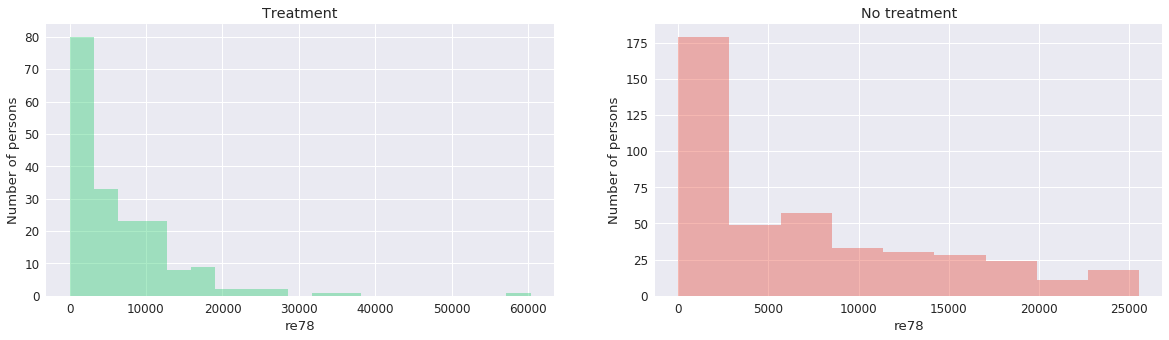

In [108]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Treatment')
plt.ylabel('Number of persons')
sns.distplot(lalonde.re78[lalonde['treat'] == 1], kde=False, color=COLOR_TREAT)
plt.subplot(122)
plt.title('No treatment')
plt.xlabel('Revenue in 1978')
plt.ylabel('Number of persons')
sns.distplot(lalonde.re78[lalonde['treat'] == 0], kde=False, color=COLOR_NO_TREAT)

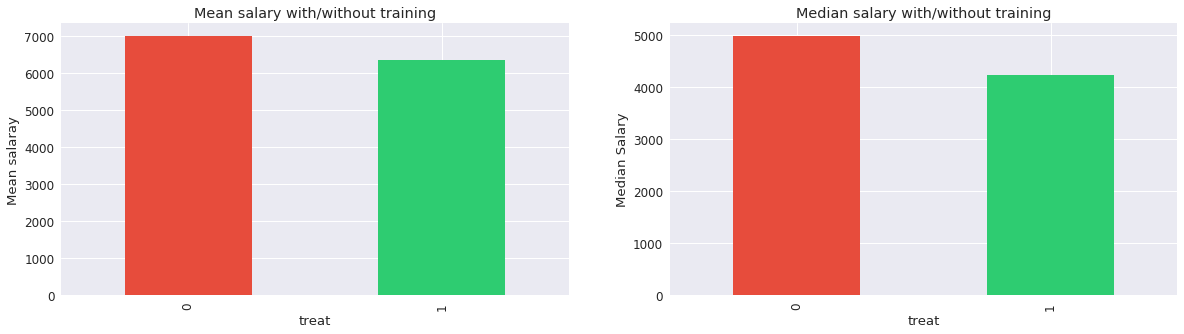

In [112]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Mean salary with/without training')
plt.ylabel('Mean salaray')
lalonde.groupby(['treat'])['re78'].mean().plot.bar(color=[COLOR_NO_TREAT, COLOR_TREAT])
plt.subplot(122)
plt.title('Median salary with/without training')
plt.ylabel('Median Salary')
lalonde.groupby(['treat'])['re78'].median().plot.bar(color=[COLOR_NO_TREAT, COLOR_TREAT])

## 2. A closer look at the data

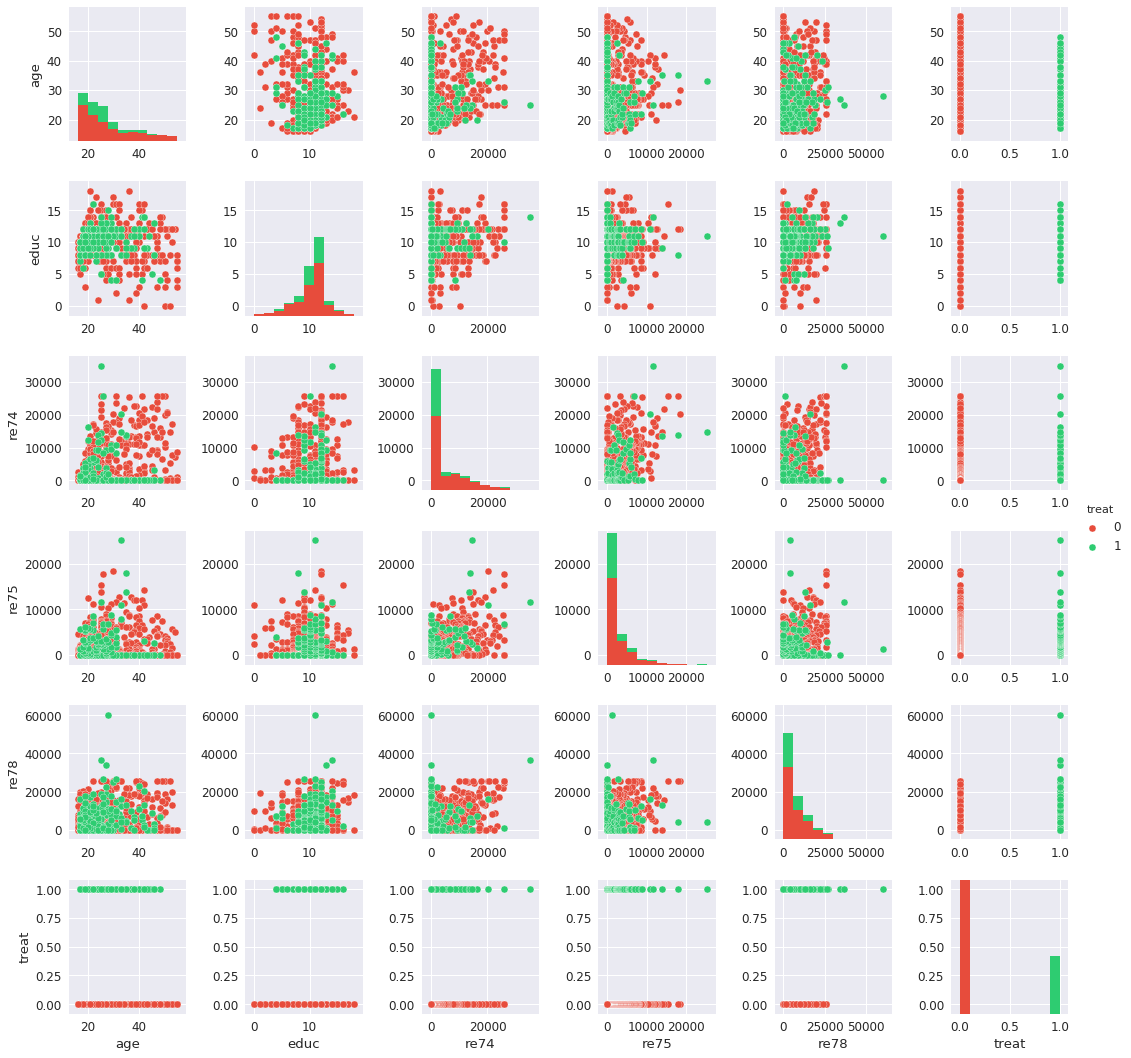

In [104]:
sns.set(font_scale=1.2)
lalonde_cat = lalonde[['black', 'hispan', 'married', 'nodegree', 'treat']]
lalonde_non_cat = lalonde[['age', 'educ', 're74', 're75', 're78', 'treat']]
sns.pairplot(lalonde_non_cat, hue='treat', palette={0:"#e74c3c", 1: "#2ecc71"})

TODO : d√©crire les obs
## 3. A propsensity score model
We should fit our model on the pre treatment features, though we will have to remove the re78 feature.

In [77]:
import sklearn.linear_model

lal = lalonde.drop(['id','treat','re78'],1)

model = sklearn.linear_model.LogisticRegression()
model.fit(lal, lalonde.treat)
pred = model.predict_proba(lal)


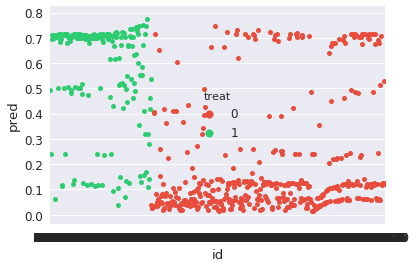

In [105]:
lalonde['pred'] = pred[:,1]
ax = sns.stripplot(x='id', y='pred', hue='treat', data=lalonde, palette={0:"#e74c3c", 1: "#2ecc71"})

## 4. Balancing the dataset via matching

In [ ]:
import networkx

## 5. Balancing the groups further
The "balanced" mode uses the values of y to automatically adjust
    weights inversely proportional to class frequencies in the input data
    as ``n_samples / (n_classes * np.bincount(y))`

## 6. A less naive analysis